In [1]:
#importing required libraries
import pypyodbc as podbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tabulate as tabulate

In [2]:
from sqlalchemy import create_engine

server = 'DESKTOP-NPV4HRT'
database = 'Ecommerce'
conn_str = f'mssql+pyodbc://{server}/{database}?driver=SQL+Server'

engine = create_engine(conn_str)

In [3]:
tables = pd.read_sql_query("SELECT table_name FROM information_schema.tables WHERE table_type = 'BASE TABLE';", engine)

In [4]:
table_name = tables["table_name"].unique().tolist()

In [5]:
dataframes = {}
for table in table_name:
    query = f'SELECT * FROM {table};'
    dataframes[table] = pd.read_sql_query(query,engine)

In [6]:
table = tables["table_name"].tolist()

In [7]:
table

['olist_customers_dataset',
 'product_category_name_translation',
 'olist_sellers_dataset',
 'olist_order_reviews_dataset',
 'olist_order_payments_dataset',
 'olist_order_items_dataset',
 'olist_geolocation_dataset',
 'olist_orders_dataset',
 'olist_products_dataset']

In [8]:
olist_customers = dataframes.get(table[0])
name_translation = dataframes.get(table[1])
olist_sellers = dataframes.get(table[2])
olist_review = dataframes.get(table[3])
olist_payements = dataframes.get(table[4])
olist_order_items = dataframes.get(table[5])
olist_geolocation = dataframes.get(table[6])
olist_orders = dataframes.get(table[7])
olist_products = dataframes.get(table[8])

# Orders

In [9]:
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.0000000,2017-10-02 11:07:15.0000000,2017-10-04 19:55:00.0000000,2017-10-10 21:25:13.0000000,2017-10-18 00:00:00.0000000
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37.0000000,2018-07-26 03:24:27.0000000,2018-07-26 14:31:00.0000000,2018-08-07 15:27:45.0000000,2018-08-13 00:00:00.0000000
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49.0000000,2018-08-08 08:55:23.0000000,2018-08-08 13:50:00.0000000,2018-08-17 18:06:29.0000000,2018-09-04 00:00:00.0000000
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06.0000000,2017-11-18 19:45:59.0000000,2017-11-22 13:39:59.0000000,2017-12-02 00:28:42.0000000,2017-12-15 00:00:00.0000000
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39.0000000,2018-02-13 22:20:29.0000000,2018-02-14 19:46:34.0000000,2018-02-16 18:17:02.0000000,2018-02-26 00:00:00.0000000


In [10]:
olist_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [11]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
#converting into datetime
olist_orders["order_purchase_timestamp"] = pd.to_datetime(olist_orders["order_purchase_timestamp"])
olist_orders["order_approved_at"] = pd.to_datetime(olist_orders["order_approved_at"])
olist_orders["order_delivered_carrier_date"] = pd.to_datetime(olist_orders["order_delivered_carrier_date"])
olist_orders["order_delivered_customer_date"] = pd.to_datetime(olist_orders["order_delivered_customer_date"])
olist_orders["order_estimated_delivery_date"] = pd.to_datetime(olist_orders["order_estimated_delivery_date"])

In [13]:
olist_orders["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [14]:
count_data = olist_orders["order_status"].value_counts()
percentage_data = (count_data / count_data.sum()) * 100
percentage_data

delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: order_status, dtype: float64

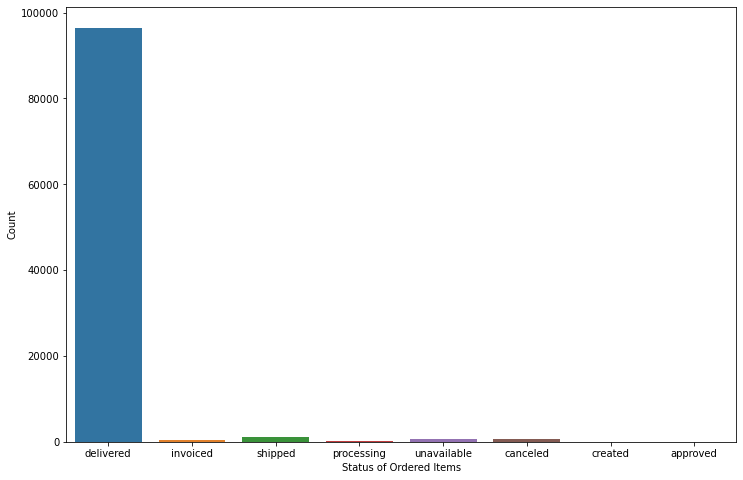

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_status", data=olist_orders)
plt.xlabel("Status of Ordered Items")
plt.ylabel("Count")
plt.show()

#### Most of the ordered items are delivered i.e. around 97%

In [16]:
olist_orders["order_purchase_timestamp"]

0       2017-10-02 10:56:33
1       2018-07-24 20:41:37
2       2018-08-08 08:38:49
3       2017-11-18 19:28:06
4       2018-02-13 21:18:39
                ...        
99436   2017-03-09 09:54:05
99437   2018-02-06 12:58:58
99438   2017-08-27 14:46:43
99439   2018-01-08 21:28:27
99440   2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]

In [17]:
#converting into AM PM format
olist_orders["order_purchase_time"] = olist_orders["order_purchase_timestamp"].dt.strftime('%p')

In [18]:
#finding the percentage
olist_orders["order_purchase_time"].value_counts()/(olist_orders["order_purchase_time"].value_counts().sum()) * 100

PM    72.868334
AM    27.131666
Name: order_purchase_time, dtype: float64

### So most of the items are ordered at night time

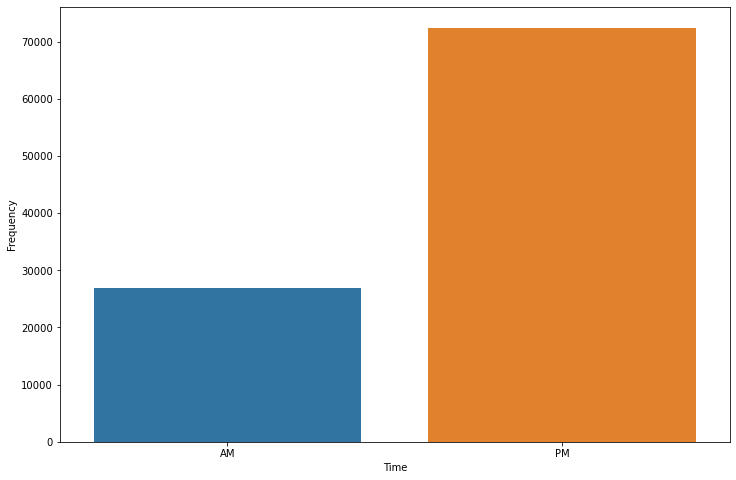

In [19]:
#plotting the time of ordered items
plt.figure(figsize=(12,8))
sns.countplot(x="order_purchase_time", data=olist_orders)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [20]:
#finding the minimum approve time
difference = olist_orders["order_delivered_customer_date"] -olist_orders["order_purchase_timestamp"] 
difference.describe()

count                         96476
mean     12 days 13:24:31.879068369
std       9 days 13:07:00.181125305
min                 0 days 12:48:07
25%          6 days 18:23:37.250000
50%                10 days 05:13:34
75%         15 days 17:17:16.250000
max               209 days 15:05:12
dtype: object

#### So at average it takes around 12 and half days for delivering the items after purchasing by customers

In [21]:
olist_orders["order_purchase_hour"] = olist_orders["order_purchase_timestamp"].dt.strftime('%H')
order = olist_orders["order_purchase_hour"].value_counts().index 

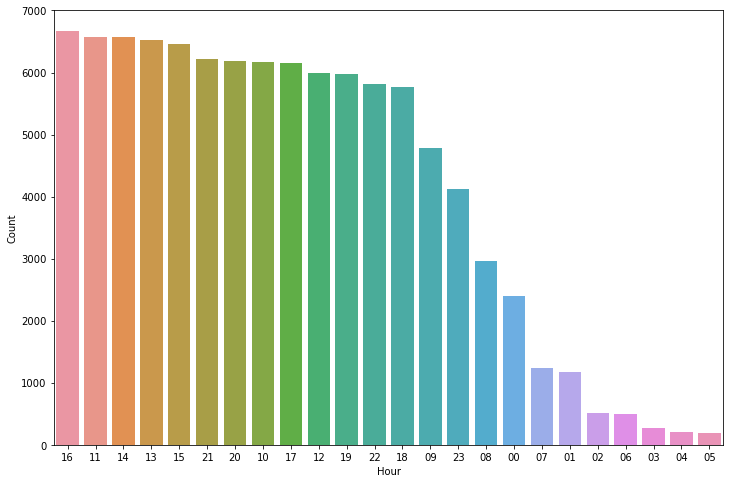

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_purchase_hour", data=olist_orders, order=order)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

##### So most of the items are purchased at around 16 i.e. 4 PM 

In [23]:
olist_orders["order_purchase_year"] = olist_orders["order_purchase_timestamp"].dt.strftime('%Y')
order = olist_orders["order_purchase_year"].value_counts().index 

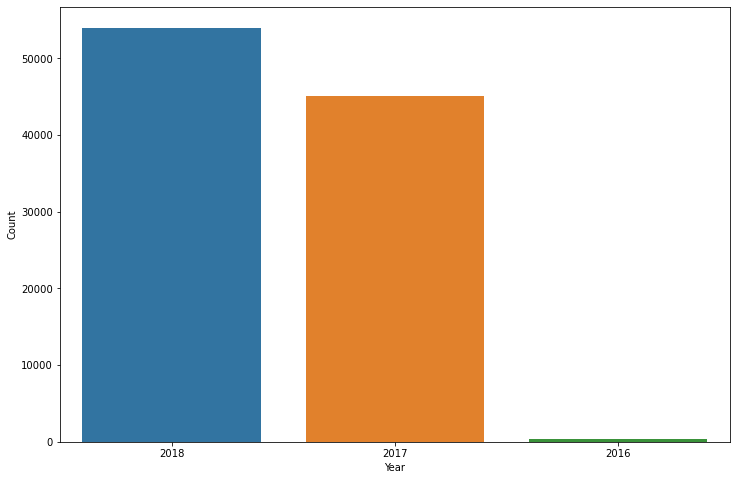

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_purchase_year", data=olist_orders, order=order)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

#### Looking at the sales we can see 2018 year had most sales of product rather than other years|

In [25]:
olist_orders["order_purchase_month"] = olist_orders["order_purchase_timestamp"].dt.strftime('%B')
order = olist_orders["order_purchase_month"].value_counts().index

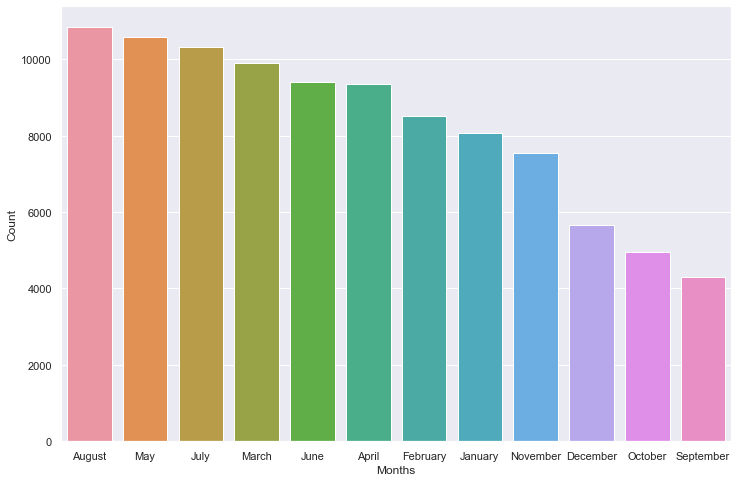

In [26]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.countplot(x="order_purchase_month", data=olist_orders, order=order)
plt.xlabel("Months")
plt.ylabel("Count")
plt.show()

#### August month had most sales in three years followed by May

# Lets's plot sales based on years

In [27]:
def plotting(w,h,x,data,label,labelx,labely,hue=None,rotation=False,order=None):
    plt.figure(figsize=(w,h))
    plt.title(label)
    sns.countplot(x=x,data=data,order=order,hue=hue)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.show()

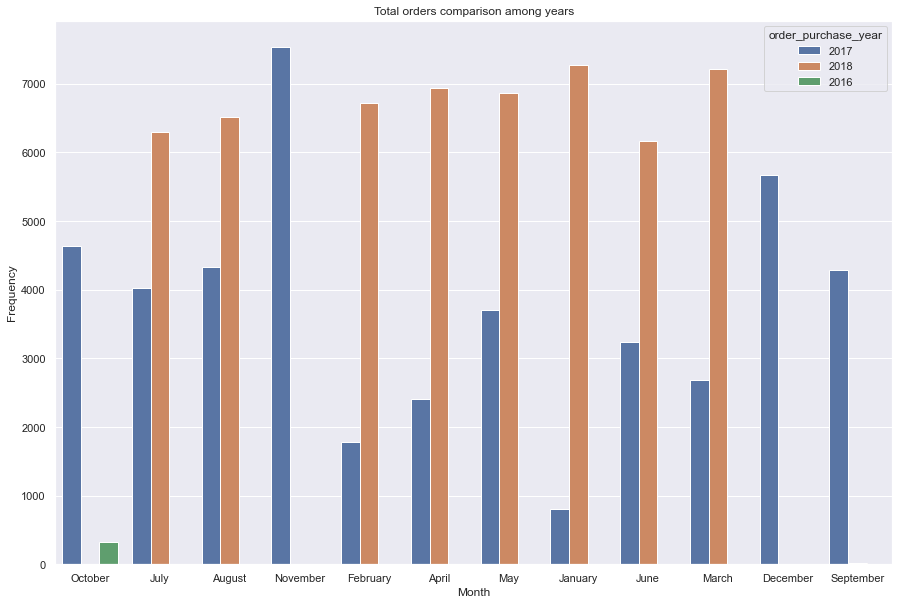

In [28]:
plotting(15,10,"order_purchase_month",olist_orders,"Total orders comparison among years","Month","Frequency",olist_orders["order_purchase_year"])

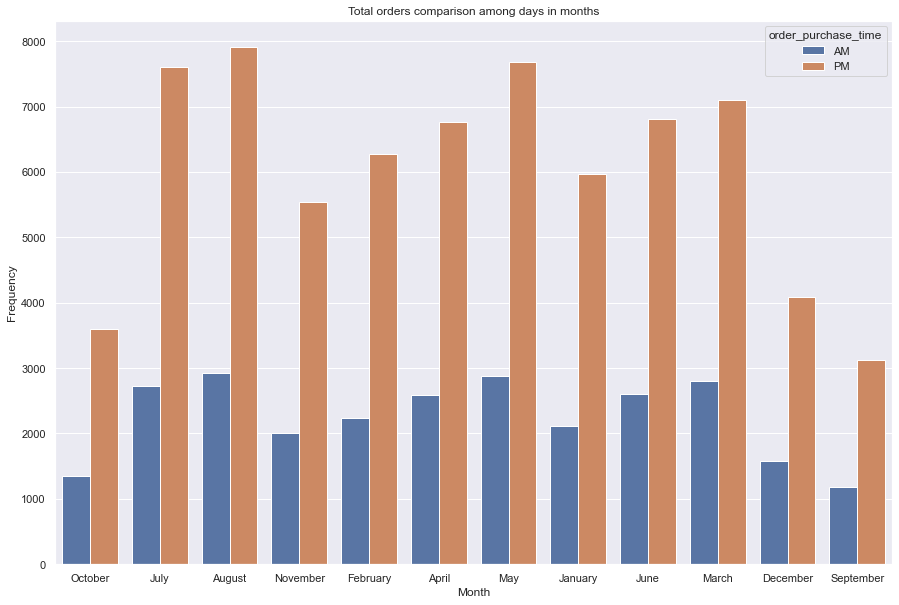

In [29]:
plotting(15,10,"order_purchase_month",olist_orders,"Total orders comparison among days in months","Month","Frequency",olist_orders["order_purchase_time"])

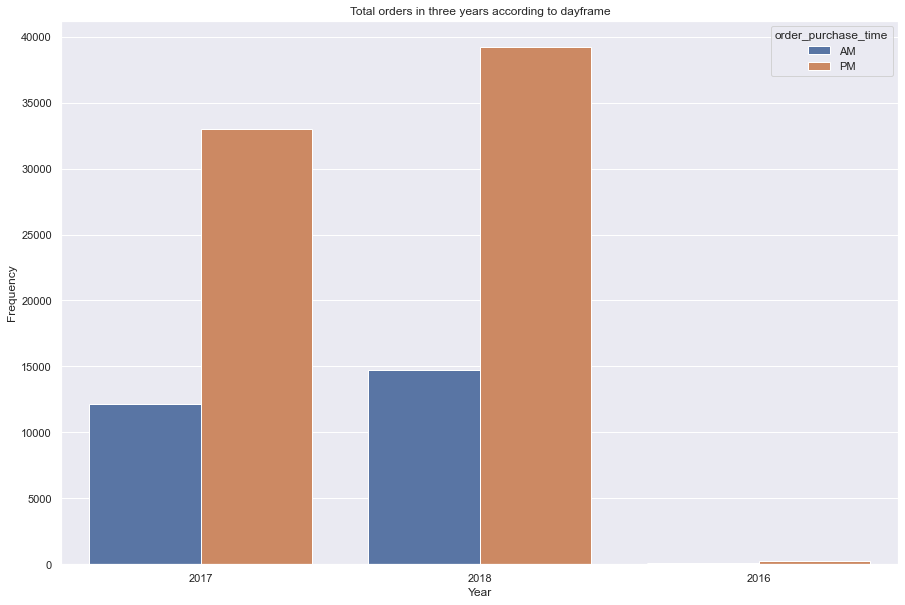

In [30]:
plotting(15,10,"order_purchase_year",olist_orders,"Total orders in three years according to dayframe","Year","Frequency",olist_orders["order_purchase_time"])

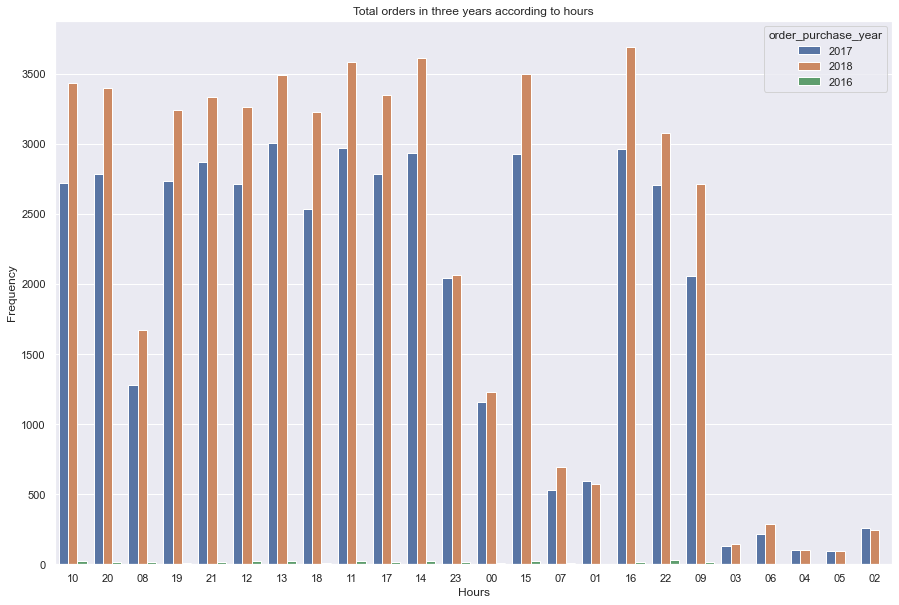

In [31]:
plotting(15,10,"order_purchase_hour",olist_orders,"Total orders in three years according to hours","Hours","Frequency",olist_orders["order_purchase_year"])

In [32]:
#converting time into dayframes
time_day=[]

for time in olist_orders["order_purchase_hour"]:
    time = int(time)
    if time >= 6 and time < 12 :
        time_day.append("Morning")
    elif time >= 12 and time < 17 :
        time_day.append("Afternoon")
    elif time >= 17 and time <= 20:
        time_day.append("Evening")
    else:
        time_day.append("Night")

In [33]:
olist_orders["order_purchase_dayframe"] = time_day

<AxesSubplot:>

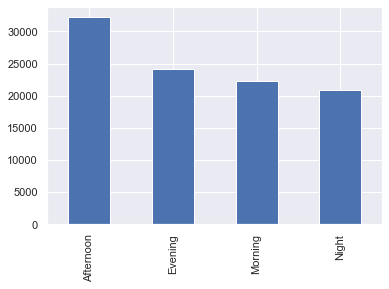

In [34]:
olist_orders["order_purchase_dayframe"].value_counts().plot(kind="bar")

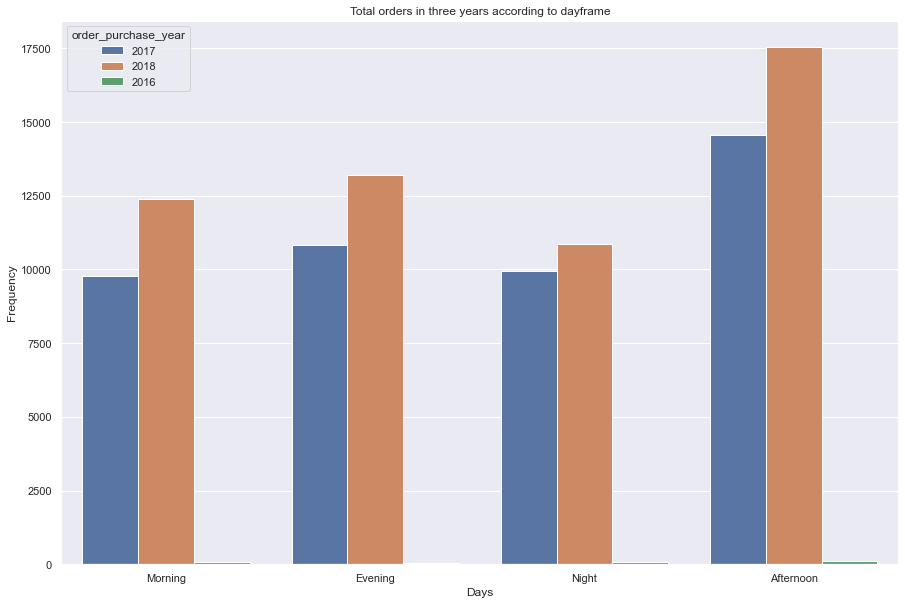

In [35]:
plotting(15,10,"order_purchase_dayframe",olist_orders,"Total orders in three years according to dayframe","Days","Frequency",olist_orders["order_purchase_year"])

In [36]:
#lets join two tables i.e. 

In [39]:
customer_orders = pd.merge(olist_orders,olist_customers,on="customer_id")

In [68]:
customers_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_time,order_purchase_hour,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,AM,10,...,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15.0000000,29.990000,8.720000
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,PM,20,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27.0000000,118.699997,22.760000
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,AM,08,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23.0000000,159.899994,19.219999
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,PM,19,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59.0000000,45.000000,27.200001
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,PM,21,...,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37.0000000,19.900000,8.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,PM,12,...,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37.0000000,174.899994,20.100000
112646,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,PM,14,...,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16.0000000,205.990005,65.019997
112647,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,PM,21,...,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21.0000000,179.990005,40.590000
112648,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,PM,21,...,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21.0000000,179.990005,40.590000


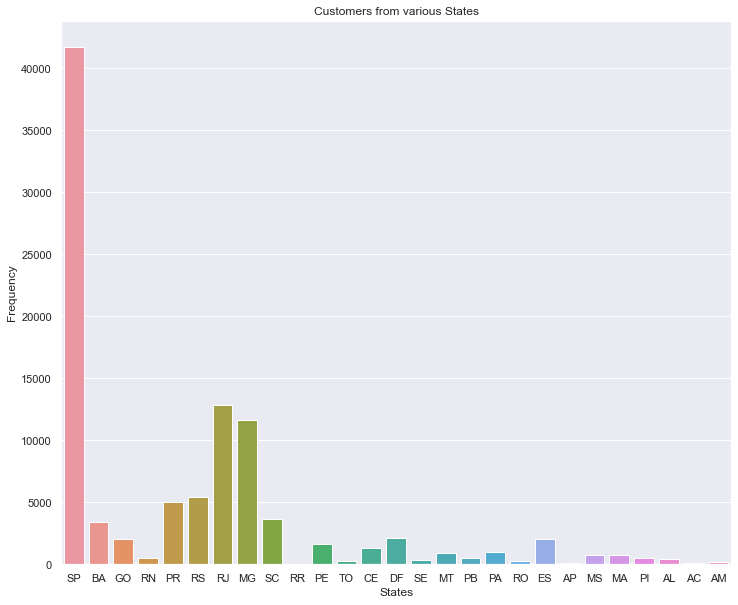

In [45]:
plotting(12,10,"customer_state",customer_orders,"Customers from various States","States","Frequency")

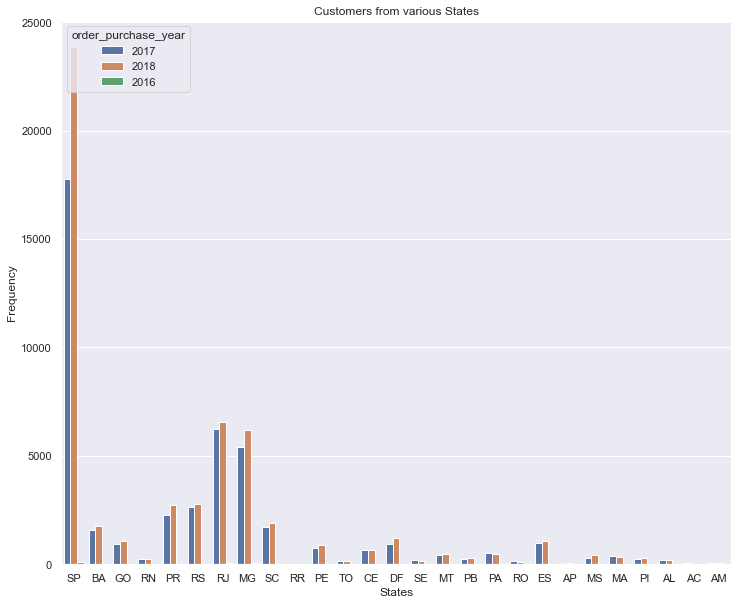

In [47]:
plotting(12,10,"customer_state",customer_orders,"Customers from various States","States","Frequency","order_purchase_year")

In [50]:
customers_orders = pd.merge(customer_orders,olist_order_items,on="order_id")

In [52]:
customers_orders["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900002
50%          74.989998
75%         134.899994
max        6735.000000
Name: price, dtype: float64

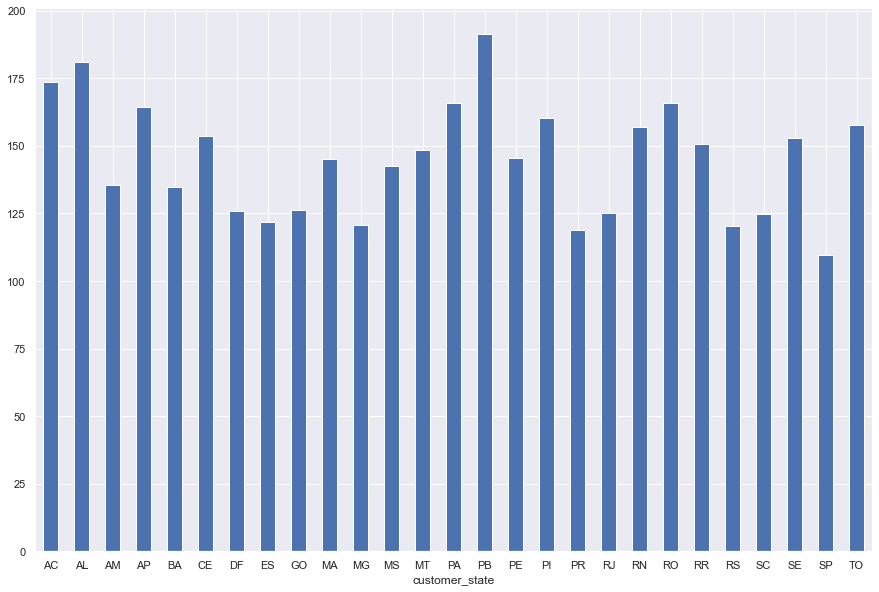

In [67]:
plt.figure(figsize=(15,10))
customers_orders.groupby("customer_state")["price"].mean().plot(kind="bar")
plt.xticks(rotation=False)
plt.show()

In [77]:
customers_orders=pd.merge(customers_orders,olist_products,on="product_id")

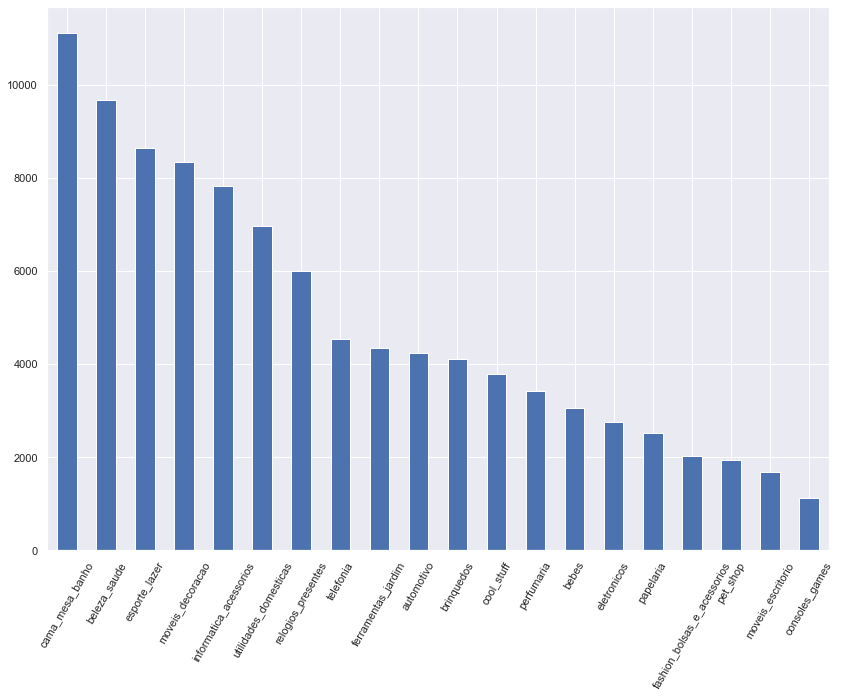

In [86]:
plt.figure(figsize=(14,10))
customers_orders["product_category_name"].value_counts().nlargest(20).plot(kind="bar")
plt.xticks(rotation=60)
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a None

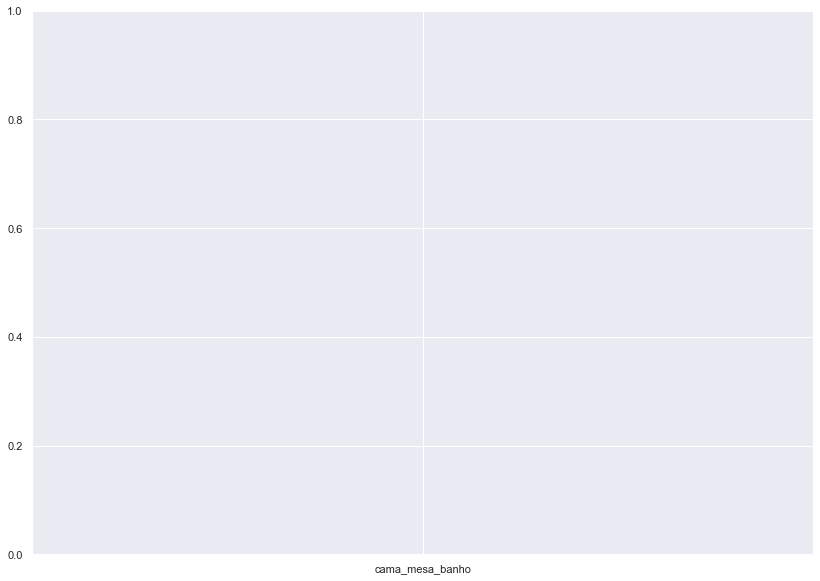

In [96]:
index = customers_orders["product_category_name"].value_counts().nlargest(20).index
plt.figure(figsize=(14,10))
plt.bar(index,customers_orders["product_category_name"])
plt.xticks(rotation=60)
plt.show()